In [1]:
import pandas as pd
import numpy as np

In [2]:
frame = pd.read_csv("titanic.csv")
frame.head()

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [3]:
modifies = frame.drop("Name", axis = 1)

In [4]:
modifies.head()

,PClass,Age,Sex,Survived,SexCode
0,1st,29.00,female,1,1
1,1st,2.00,female,0,1
2,1st,30.00,male,0,0
3,1st,25.00,female,0,1
4,1st,0.92,male,1,0


In [7]:
modifies.Sex = modifies["Sex"].apply(lambda x: 1 if x == "male" else 0)
modifies.head()

,PClass,Age,Sex,Survived,SexCode
0,1st,29.00,0,1,1
1,1st,2.00,0,0,1
2,1st,30.00,1,0,0
3,1st,25.00,0,0,1
4,1st,0.92,1,1,0


In [8]:
modifies["first-class"] = modifies.PClass.apply(lambda x: 1 if x == "1st" else 0)

In [9]:
modifies.head()

,PClass,Age,Sex,Survived,SexCode,first-class
0,1st,29.00,0,1,1,1
1,1st,2.00,0,0,1,1
2,1st,30.00,1,0,0,1
3,1st,25.00,0,0,1,1
4,1st,0.92,1,1,0,1


In [10]:
modifies.PClass.unique()

array(['1st', '2nd', '*', '3rd'], dtype=object)

In [11]:
modifies.isnull().sum()

PClass           0
Age            557
Sex              0
Survived         0
SexCode          0
first-class      0
dtype: int64

In [12]:
modifies.drop("first-class", axis= 1, inplace=True)

In [13]:
modifies.head()

,PClass,Age,Sex,Survived,SexCode
0,1st,29.00,0,1,1
1,1st,2.00,0,0,1
2,1st,30.00,1,0,0
3,1st,25.00,0,0,1
4,1st,0.92,1,1,0


In [15]:
a = pd.get_dummies(modifies.PClass)

In [17]:
complete = pd.concat([modifies, a], axis = 1)

In [18]:
complete.head()

,PClass,Age,Sex,Survived,SexCode,*,1st,2nd,3rd
0,1st,29.00,0,1,1,0,1,0,0
1,1st,2.00,0,0,1,0,1,0,0
2,1st,30.00,1,0,0,0,1,0,0
3,1st,25.00,0,0,1,0,1,0,0
4,1st,0.92,1,1,0,0,1,0,0


In [19]:
complete.drop("PClass", axis = 1, inplace= True)

In [20]:
complete.head()

,Age,Sex,Survived,SexCode,*,1st,2nd,3rd
0,29.00,0,1,1,0,1,0,0
1,2.00,0,0,1,0,1,0,0
2,30.00,1,0,0,0,1,0,0
3,25.00,0,0,1,0,1,0,0
4,0.92,1,1,0,0,1,0,0


In [21]:
complete.fillna(complete.mean(), inplace=True)
complete.head() 

,Age,Sex,Survived,SexCode,*,1st,2nd,3rd
0,29.00,0,1,1,0,1,0,0
1,2.00,0,0,1,0,1,0,0
2,30.00,1,0,0,0,1,0,0
3,25.00,0,0,1,0,1,0,0
4,0.92,1,1,0,0,1,0,0


In [22]:
complete.isnull().sum()

Age         0
Sex         0
Survived    0
SexCode     0
*           0
1st         0
2nd         0
3rd         0
dtype: int64

#### Up to this the preprocessing is completed

In [23]:
# Applying Knn for binary Classifier
X = complete.drop("Survived", axis = 1)
y = complete["Survived"]

In [24]:
X.shape

(1313, 7)

In [25]:
y.shape

(1313,)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

In [27]:
X_train.shape

(1050, 7)

In [28]:
y_train.shape

(1050,)

In [29]:
X_test.shape

(263, 7)

In [30]:
y_test.shape

(263,)

In [31]:
# Training the classifier
from sklearn.neighbors import KNeighborsClassifier
neighbours = [i for i in range(1,21)]
score = []
for i in neighbours:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test))
    

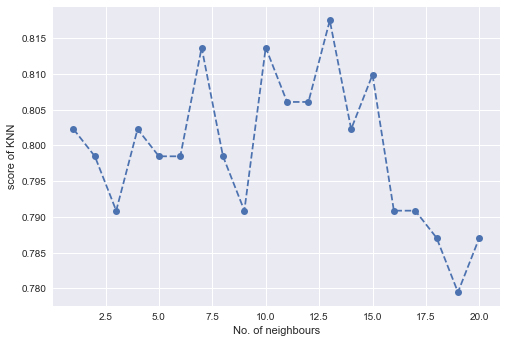

In [38]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(neighbours, score, marker = "o", linestyle = "--")
plt.xlabel("No. of neighbours")
plt.ylabel("score of KNN")
plt.show()

In [40]:
result = pd.DataFrame(neighbours, columns=["neighbours"])

In [42]:
result["score"] = score
result

,neighbours,score
0,1,0.802281
1,2,0.798479
2,3,0.790875
3,4,0.802281
4,5,0.798479
5,6,0.798479
6,7,0.813688
7,8,0.798479
8,9,0.790875
9,10,0.813688


In [43]:
y_pred = knn.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, recall_score
print("Accuracy score is", accuracy_score(y_pred, y_test))

Accuracy score is 0.7870722433460076


In [50]:
result.score[result.score > 0.81]

6     0.813688
9     0.813688
12    0.817490
Name: score, dtype: float64

In [51]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

E:\Anaconda_Install\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8098859315589354

In [52]:
forest.classes_

array([0, 1], dtype=int64)

In [54]:
forest.n_estimators

10

In [55]:
forest.n_features_

7

In [56]:
complete.head()

,Age,Sex,Survived,SexCode,*,1st,2nd,3rd
0,29.00,0,1,1,0,1,0,0
1,2.00,0,0,1,0,1,0,0
2,30.00,1,0,0,0,1,0,0
3,25.00,0,0,1,0,1,0,0
4,0.92,1,1,0,0,1,0,0


In [59]:
forest.feature_importances_

array([3.93730690e-01, 1.88092727e-01, 2.16745754e-01, 1.23830376e-04,
       7.05236762e-02, 1.88080176e-02, 1.11975304e-01])

In [60]:
# Training without the sex code

In [62]:
 df = complete 


In [63]:
df.head()

,Age,Sex,Survived,SexCode,*,1st,2nd,3rd
0,29.00,0,1,1,0,1,0,0
1,2.00,0,0,1,0,1,0,0
2,30.00,1,0,0,0,1,0,0
3,25.00,0,0,1,0,1,0,0
4,0.92,1,1,0,0,1,0,0


In [64]:
df.drop("SexCode", axis = 1, inplace = True)

In [65]:
df.head()

,Age,Sex,Survived,*,1st,2nd,3rd
0,29.00,0,1,0,1,0,0
1,2.00,0,0,0,1,0,0
2,30.00,1,0,0,1,0,0
3,25.00,0,0,0,1,0,0
4,0.92,1,1,0,1,0,0


In [66]:
X = df.drop("Survived", axis = 1)

In [67]:
y = df["Survived"]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

In [69]:
forest1 = RandomForestClassifier(random_state=1)
forest1.fit(X_train, y_train)
forest1.score(X_test, y_test)

E:\Anaconda_Install\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8098859315589354

In [70]:
forest1.feature_importances_

array([3.84546538e-01, 4.01180258e-01, 2.68846058e-05, 1.08437322e-01,
       2.11417479e-02, 8.46672492e-02])

In [71]:
df.head()

,Age,Sex,Survived,*,1st,2nd,3rd
0,29.00,0,1,0,1,0,0
1,2.00,0,0,0,1,0,0
2,30.00,1,0,0,1,0,0
3,25.00,0,0,0,1,0,0
4,0.92,1,1,0,1,0,0


In [72]:
new_x = df.drop(["Survived", "*", "1st", "2nd"], axis = 1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(new_x, y, train_size = 0.8, random_state = 1)

In [76]:
forest_second = RandomForestClassifier(random_state=1)
forest_second.fit(X_train, y_train)
import warnings as ws
ws.defaultaction = "ignore"

In [78]:
forest_second.score(X_test, y_test) *100

82.88973384030417

In [85]:
df.groupby(["Sex", "Survived"])["Age"].mean()

Sex  Survived
0    0           27.863851
     1           30.728529
1    0           31.406844
     1           27.392166
Name: Age, dtype: float64

In [86]:
# Counting no. of males and females
df.groupby("Sex").count()

,Age,Survived,*,1st,2nd,3rd
Sex,,,,,,
0,462,462,462,462,462,462
1,851,851,851,851,851,851
